### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH  (UPDATED 20220326 to do the Rapid React)
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [187]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from pathlib import Path
from importlib import reload

In [188]:
import telemetry_plot_utils as tpu 

In [189]:
robot_dir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot')
reload(tpu)
print(f'tpu.robot_dir is {tpu.robot_dir}')
tpu.set_path(robot_dir)

tpu.robot_dir is None


### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [190]:
path_weaver_files = data_files = tpu.get_paths()
path_weaver_files

['C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_circle',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_meters',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\balls',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\barrel_pw1',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\bounce_pw4',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate_rev',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\field_cal',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\hub_to_ball',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\slalom_pw4_smooth',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\terminal_ball',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\terminal_to_shot',
 'C:\\C

In [191]:
df_points = tpu.get_points_df(name='balls')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,5.047561,-2.019846,0.000000,0.000000,True,False,NaN
1,6.101200,-0.879438,0.829441,0.588250,False,False,NaN
2,7.539106,-0.259650,0.992460,0.198521,False,False,NaN
3,9.076178,-0.272046,1.416001,-0.281639,False,False,NaN
4,11.518139,-1.871097,0.820955,-1.198901,False,False,NaN


#### trick to get all four bounce paths in one point list

In [192]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,6.851779,-1.154910,-0.010706,0.425696,True,True,NaN
1,7.133304,-2.677613,-0.536946,0.338077,True,True,NaN
2,8.148597,-2.770440,-0.258530,0.000000,True,True,NaN


#### trick to get multiple paths in one point list

In [193]:
traversal = ['hub_to_ball', 'two_ball_traversal', 'terminal_to_shot']
dfs = []
for traversal_file in traversal:
    dfs.append(tpu.get_points_df(name=traversal_file))
df_traversal_points = pd.concat(dfs)
df_traversal_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,7.819413,-5.335819,-0.668212,-1.778307,True,False,NaN
1,7.646971,-7.829600,-0.010778,-0.495770,True,False,First Ball
0,7.603861,-7.829600,-0.775988,0.528103,True,False,Before Rotate
1,4.812458,-6.532134,-0.883765,0.000000,True,False,NaN
2,2.904820,-6.844685,-1.616642,-0.743656,True,False,FirstBall
3,1.568395,-7.512897,-0.269440,-0.193997,True,False,TerminalBall
0,1.568395,-7.211124,-0.269440,-0.172442,True,True,TerminalBall
1,3.820917,-7.178791,-1.636238,-0.037187,True,True,NaN
2,7.215866,-7.146458,-0.351727,-1.451371,True,True,ShotLocation


#### generate all point paths into one dictionary

In [194]:
names = [Path(f).name for f in path_weaver_files]
point_dfs = {}
for f in names:
    point_dfs.update({f:tpu.get_points_df(name=f, x_shift=0, y_shift=0)})
point_dfs.keys()

dict_keys(['2_circle', '2_meters', 'balls', 'barrel_pw1', 'bounce_pw4', 'calibrate', 'calibrate_rev', 'field_cal', 'hub_to_ball', 'slalom_pw4_smooth', 'terminal_ball', 'terminal_to_shot', 'two_ball_traversal'])

In [195]:
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
df_data.columns

Index(['TIME', 'RBT_X', 'RBT_Y', 'RBT_TH', 'RBT_VEL', 'RBT_RVEL', 'RBT_LVEL',
       'TRAJ_X', 'TRAJ_Y', 'TRAJ_TH', 'TRAJ_VEL', 'RAM_VELX', 'RAM_LVEL_SP',
       'RAM_RVEL_SP', 'RAM_OM', 'LFF', 'RFF', 'LPID', 'RPID', 'DELTA', 'VEC_X',
       'VEC_Y'],
      dtype='object')

In [196]:
df_data.head()

,TIME,RBT_X,RBT_Y,RBT_TH,RBT_VEL,RBT_RVEL,RBT_LVEL,TRAJ_X,TRAJ_Y,TRAJ_TH,...,RAM_LVEL_SP,RAM_RVEL_SP,RAM_OM,LFF,RFF,LPID,RPID,DELTA,VEC_X,VEC_Y
0,0.040875,1.478379,0.646702,-2.529929,0.068032,0.069664,0.066399,1.570538,1.008176,-2.588356,...,-0.216142,-0.394463,-0.292522,-3.829730,-6.000000,-0.042381,-0.069619,0.063938,-0.053025,-0.035727
1,0.140977,1.531093,0.682887,-2.548677,-1.097382,-1.587476,-0.607288,1.594815,1.019714,-2.824840,...,-0.406339,-3.087980,-4.399018,1.105772,-2.283733,0.030142,-0.225076,0.063938,-0.053025,-0.035727
2,0.241064,1.606654,0.725778,-2.699778,-0.752035,-0.852782,-0.651287,1.650136,1.030625,-3.013529,...,-0.655070,-1.611668,-1.569222,-2.841497,-0.733795,-0.000567,-0.113833,0.086886,-0.078543,-0.037151
3,0.340747,1.690900,0.764236,-2.716477,-1.175468,-1.222600,-1.128336,1.735936,1.037529,-3.077737,...,-1.045784,-1.695516,-1.065833,-2.898487,-3.833770,0.012383,-0.070937,0.092609,-0.084366,-0.038194
4,0.441398,1.817519,0.819950,-2.741665,-1.585112,-1.730548,-1.439675,1.852997,1.042741,-3.114809,...,-1.325338,-1.929652,-0.991329,-3.155572,-4.236760,0.017151,-0.029866,0.138334,-0.127418,-0.053861


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

In [197]:
pix_per_m =  16.4 / 1711
left_offset =  66 * pix_per_m
right_offset =  79 * pix_per_m
(left_offset, right_offset)

(0.6326125073056692, 0.757218001168907)

In [198]:
pix_per_m =  8.23 / 865
top_offset =  43 * pix_per_m
bottom_offset =  42 * pix_per_m
(top_offset, bottom_offset)

(0.409121387283237, 0.39960693641618494)

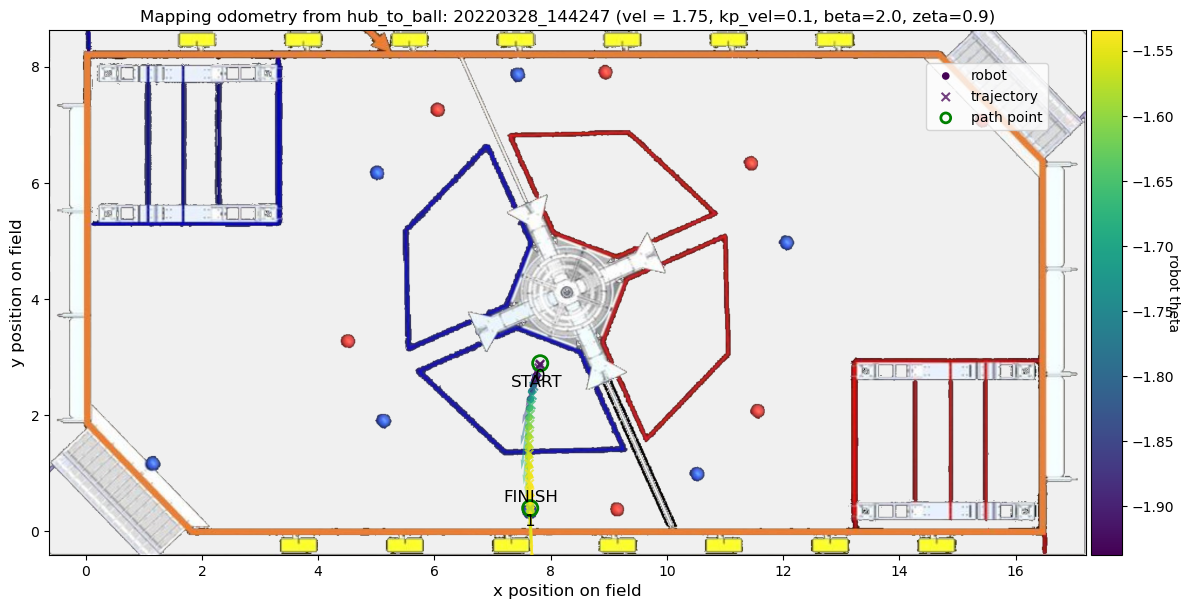

In [199]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['hub_to_ball'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

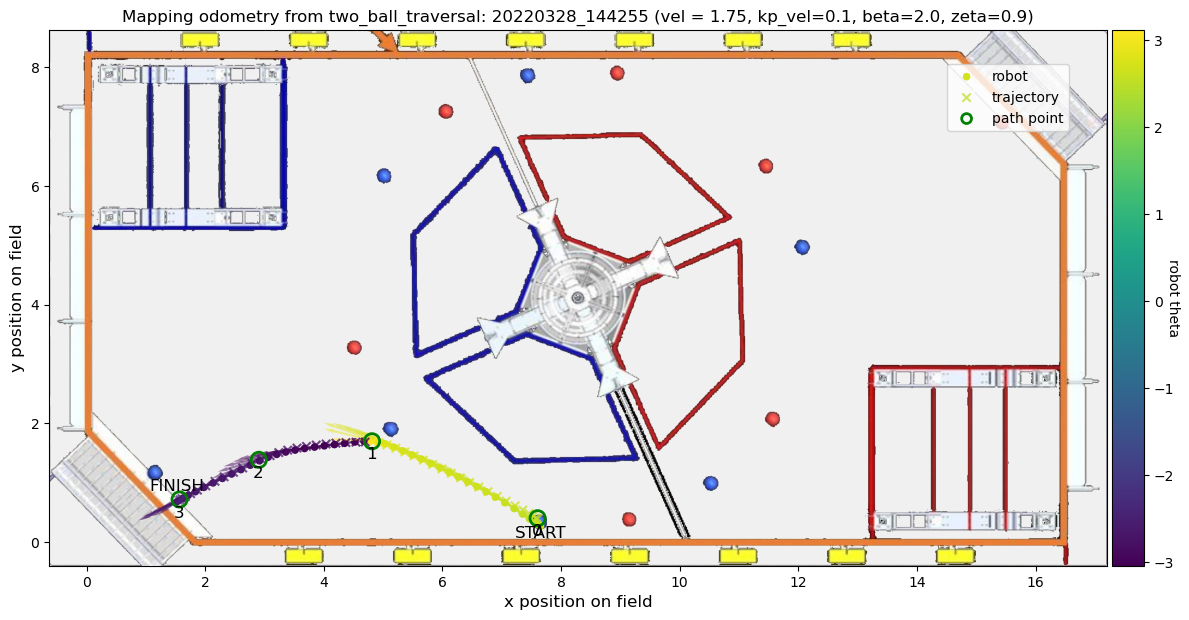

In [200]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['two_ball_traversal'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

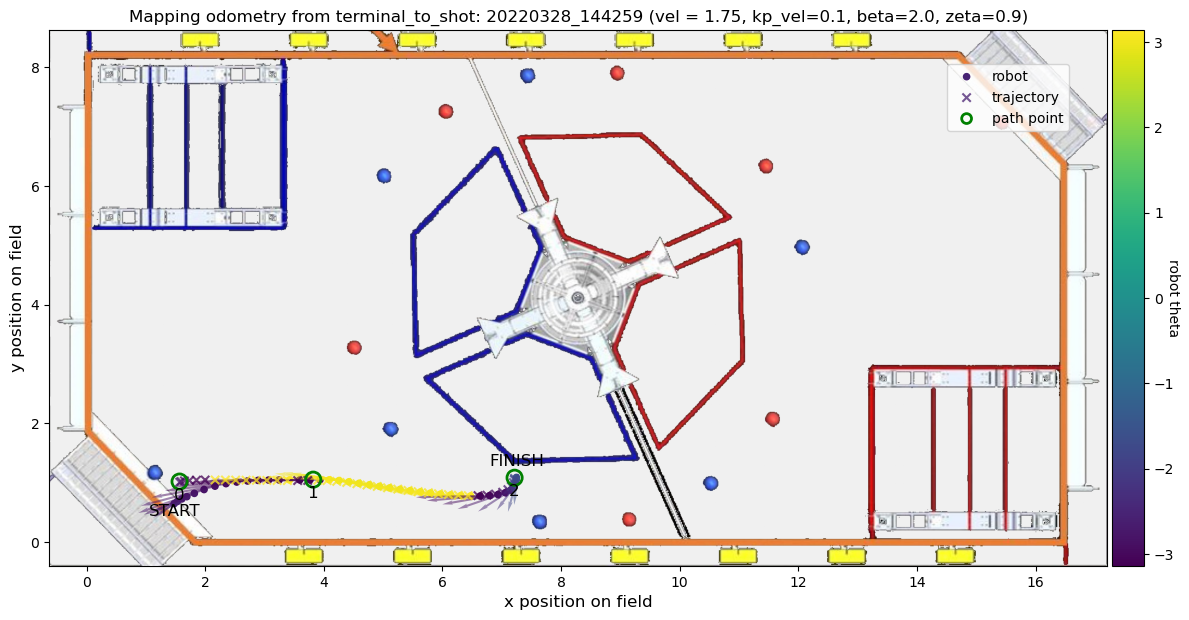

In [201]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['terminal_to_shot'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

### old stuff, don't execute.  2021 stuff is broken in the 2022 version for now

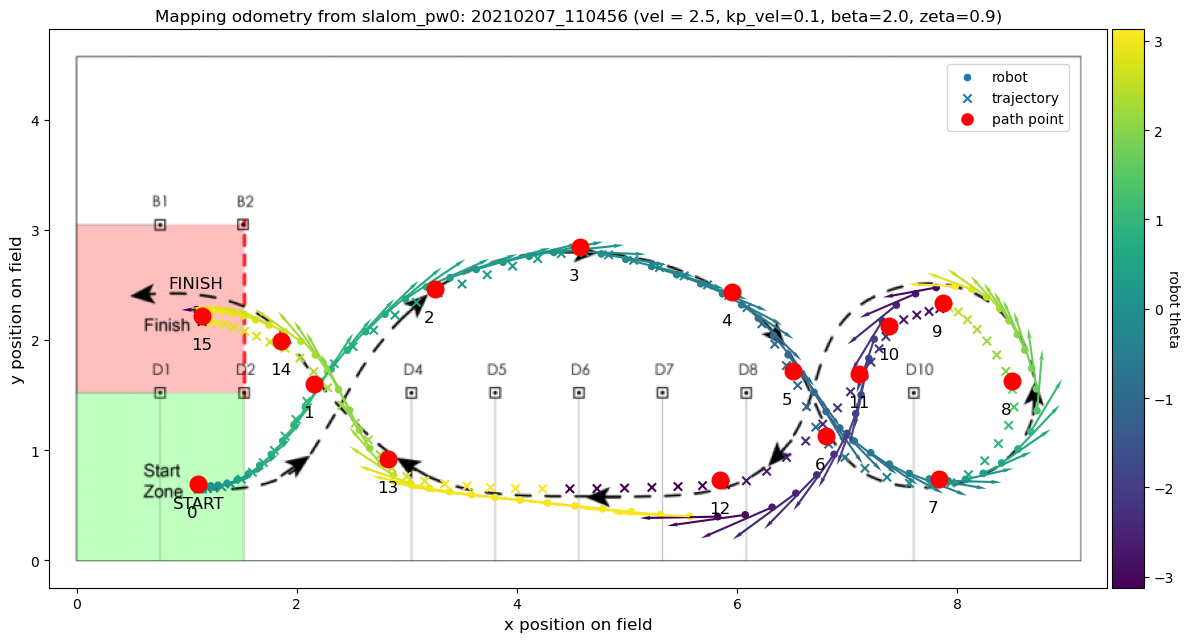

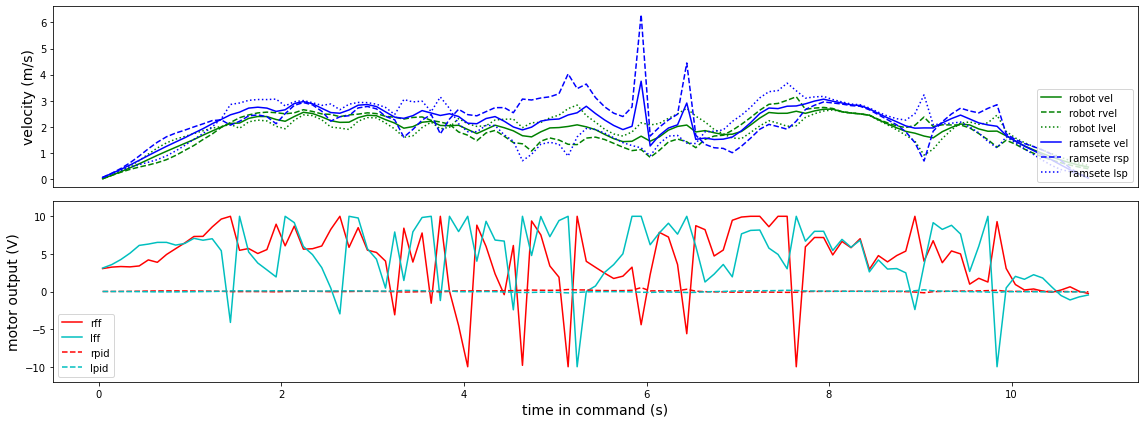

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

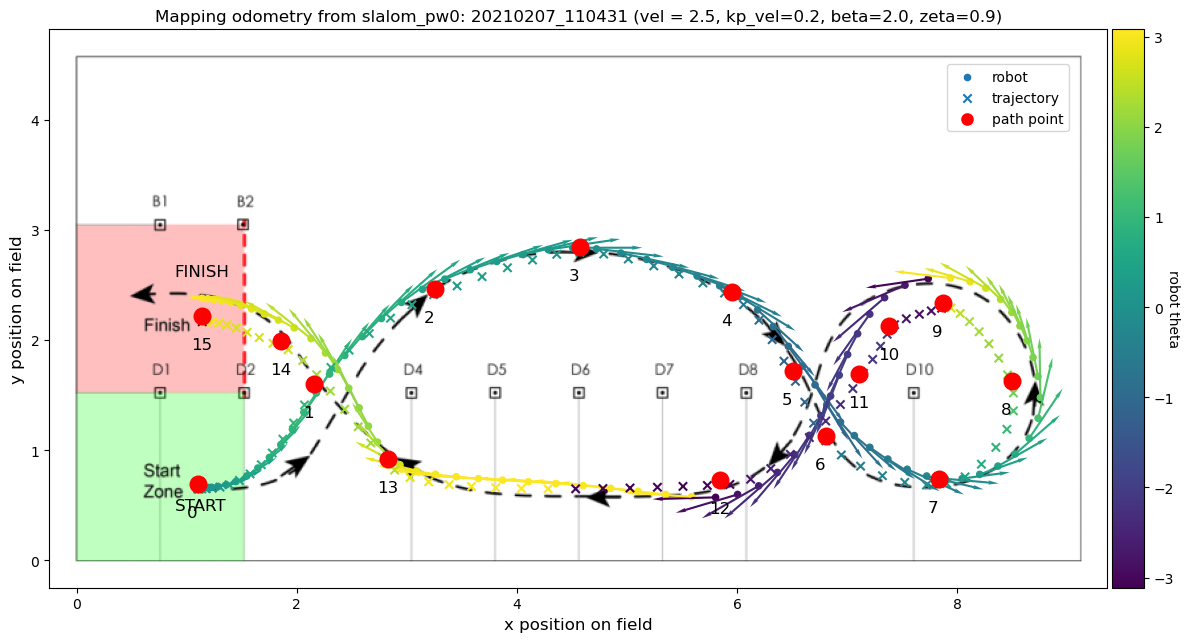

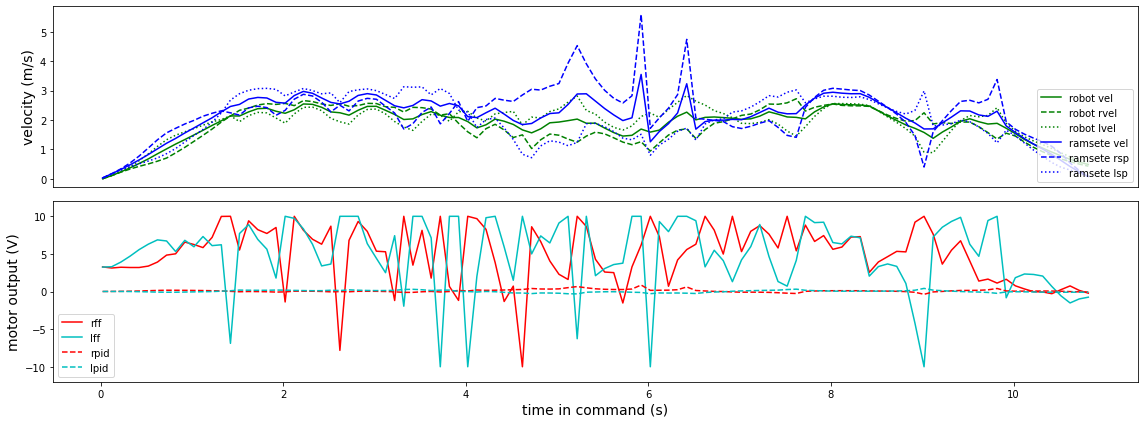

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

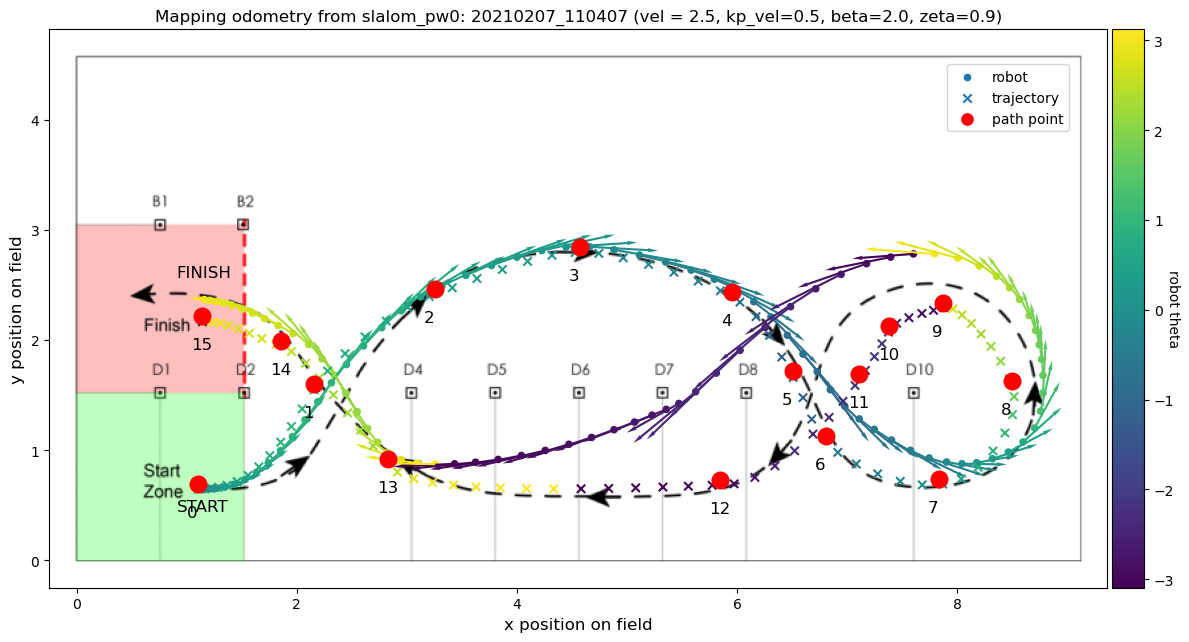

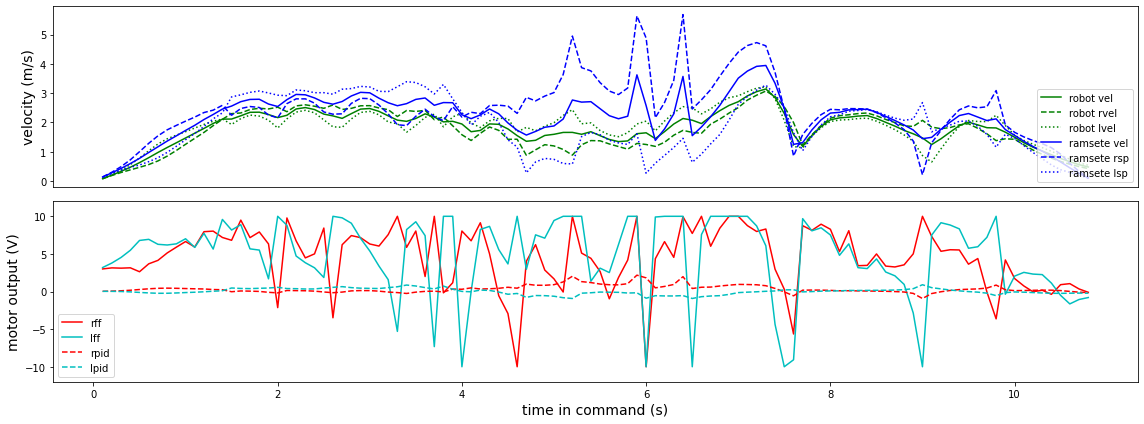

In [64]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-4, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)